In [0]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import load_boston
%matplotlib inline

In [0]:
boston_data = load_boston()

In [0]:
#Set the dataframe to work with from the boston data
df = pd.DataFrame(boston_data.data)

In [4]:
#Check the data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
#Set the columns name instead of numbers from the boston data since 
df.columns = boston_data.feature_names

In [6]:
#Check the data after adding columns names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#Show details for each feature and the data set
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
#Get the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
#Get Statistical snap for each feature
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


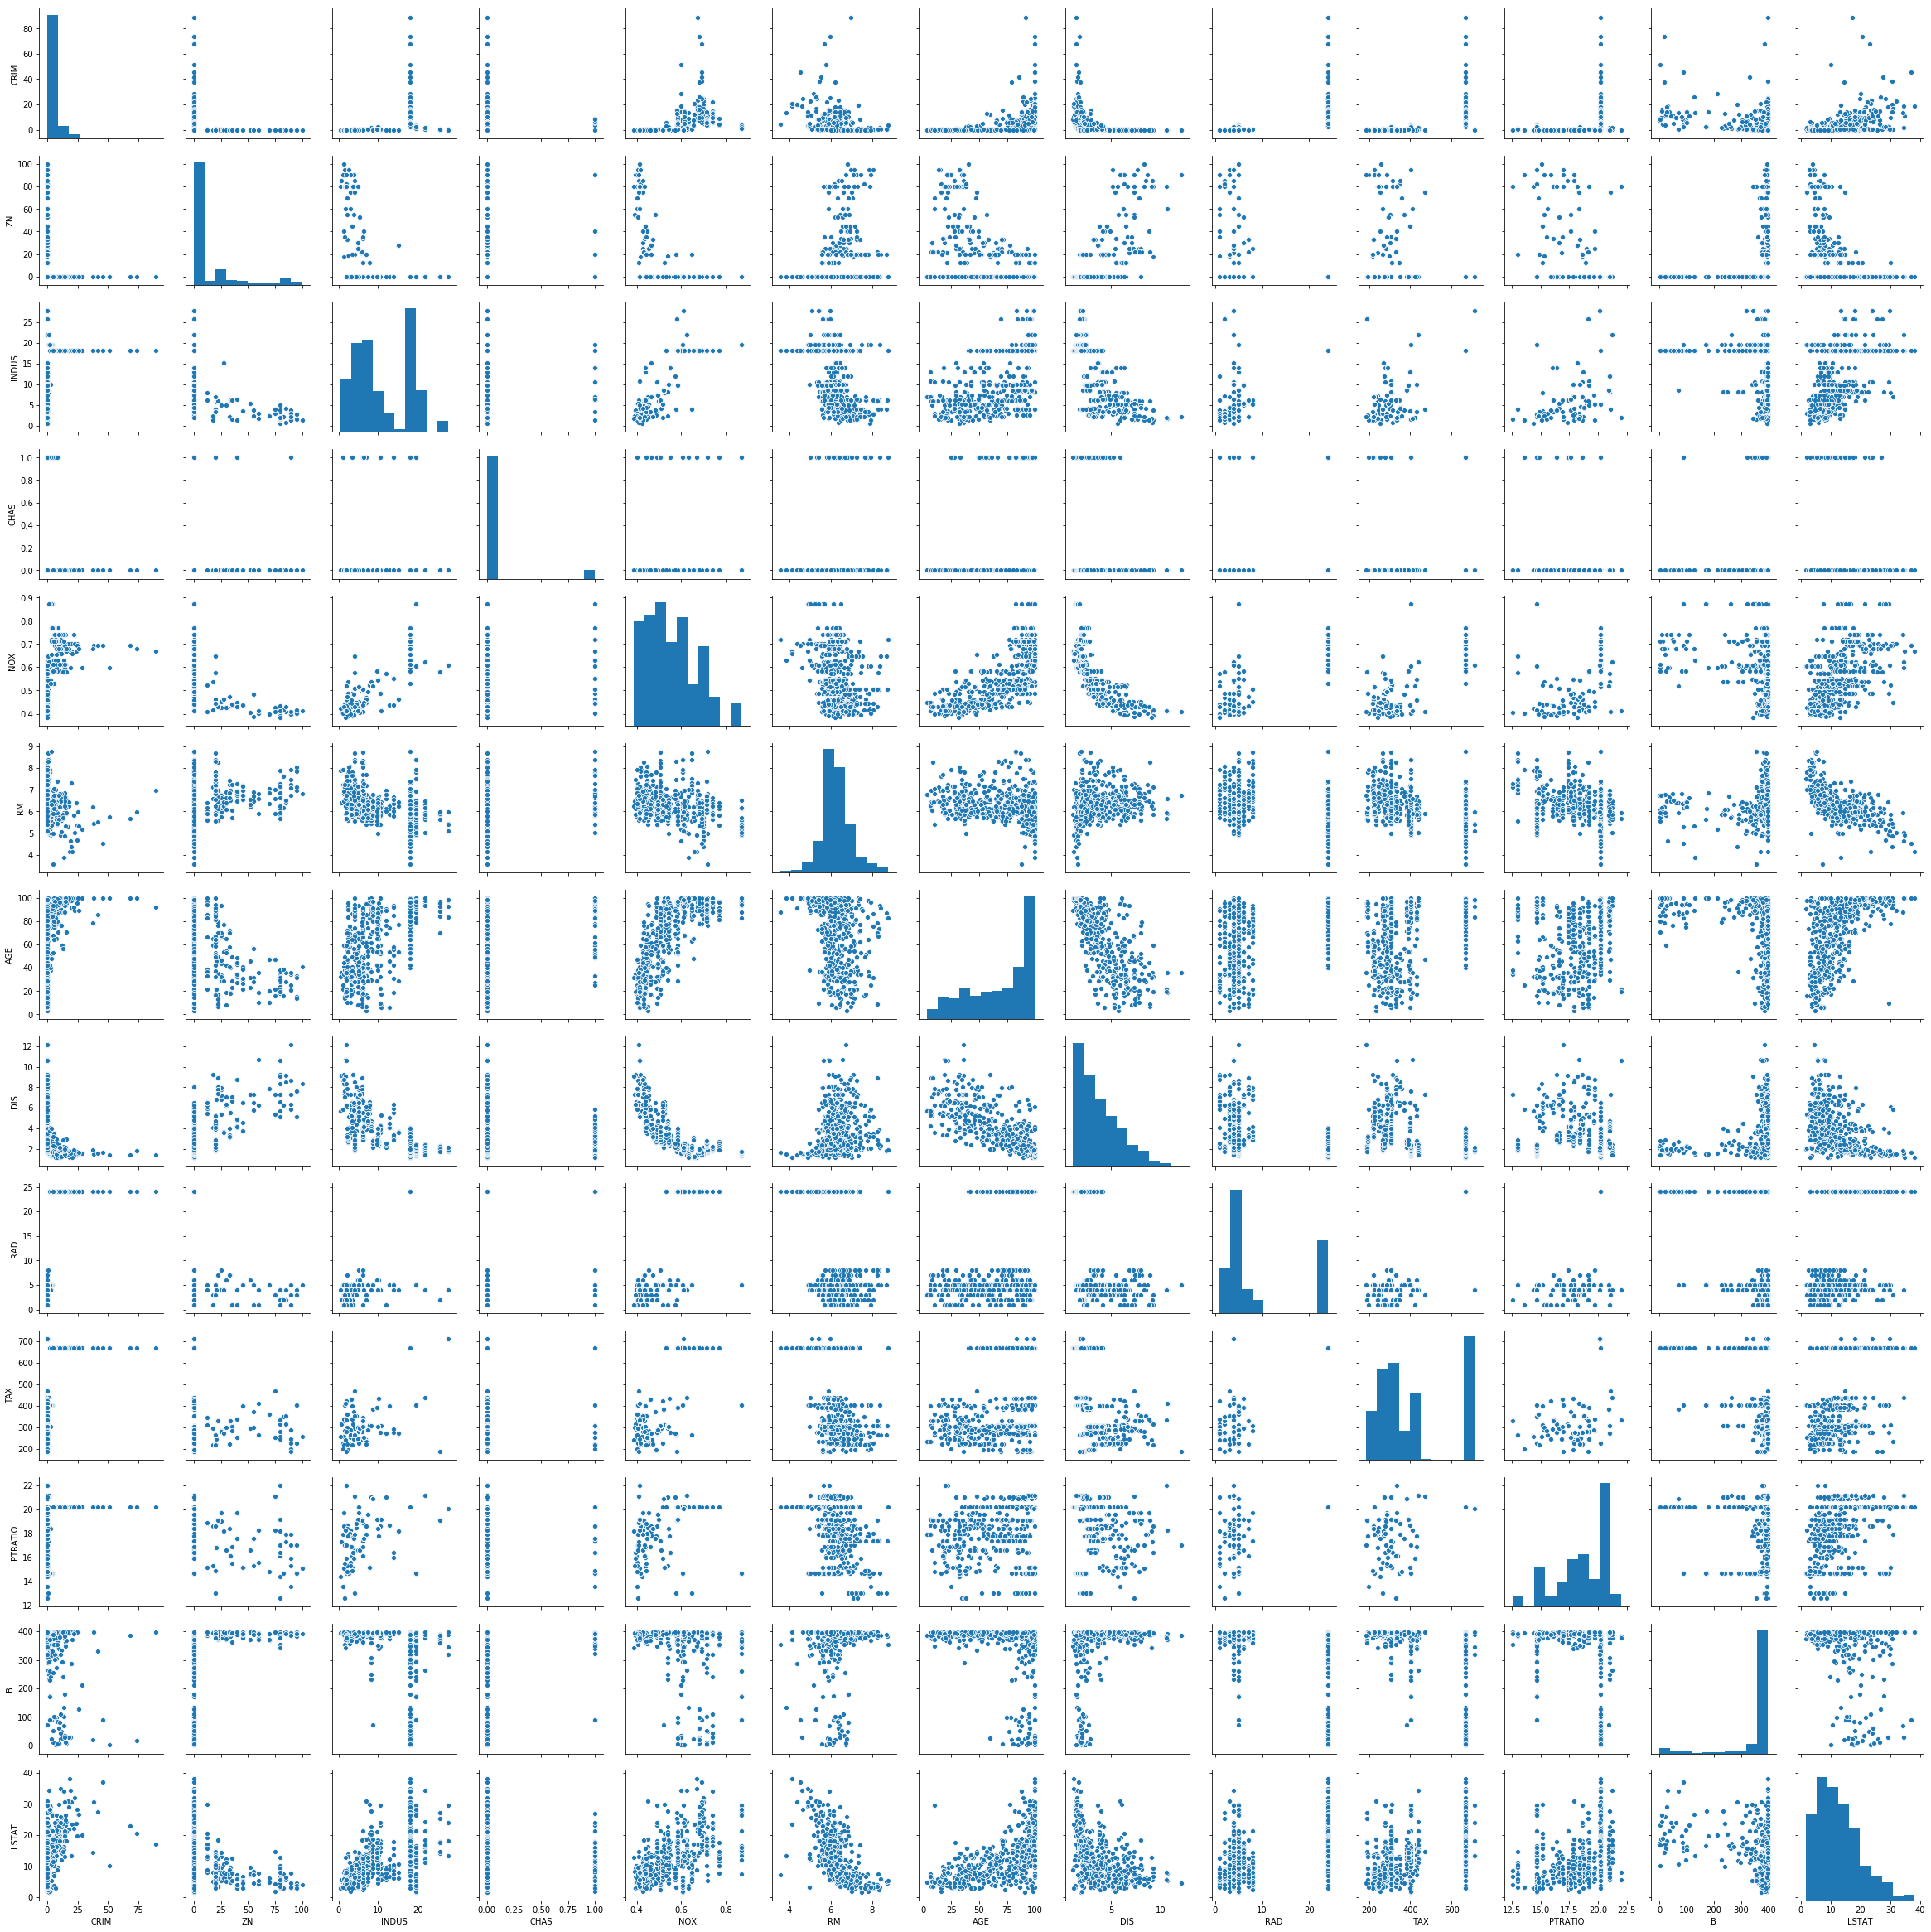

In [10]:
#Plot the data
sns.pairplot(df)

In [0]:
#Adding the Price column from the data
df['Price'] = boston_data.target

In [12]:
#Check the data after adding Price
df.head

<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0     0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1     0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2     0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3     0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4     0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
5     0.02985   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.12   5.21   28.7
6     0.08829  12.5   7.87   0.0  0.524  ...  311.0     15.2  395.60  12.43   22.9
7     0.14455  12.5   7.87   0.0  0.524  ...  311.0     15.2  396.90  19.15   27.1
8     0.21124  12.5   7.87   0.0  0.524  ...  311.0     15.2  386.63  29.93   16.5
9     0.17004  12.5   7.87   0.0  0.524  ...  311.0     15.2  386.71  17.10   18.9
10    0.22489  12.5   7.87   0.0  0.524  ...  311.0     1

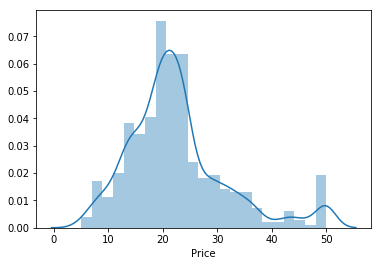

In [13]:
#Ditribution plot for the Price 
sns.distplot(df['Price'])

In [14]:
#Get columns names
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [0]:
#Prepare our data
#All features except the Price
X = df.drop('Price', axis=1)
#The Price feature which we want to predict
y = df['Price']

In [0]:
#Perform Train/Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
#Get the array shape for our test and train data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
#Intiate our Linear Model
linear = LinearRegression()

In [19]:
#Perform Linear Model fit
linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#g=Get the intercept value
print(linear.intercept_)

23.554245467591265


In [21]:
#Get the coefficients
linear.coef_

array([-1.24649091e-01,  3.04735052e-02,  2.17990089e-02,  2.79225761e+00,
       -1.52135247e+01,  5.27249266e+00, -1.10577742e-02, -1.27320872e+00,
        2.65804711e-01, -1.15043029e-02, -9.19571148e-01,  1.01624292e-02,
       -3.89712044e-01])

In [22]:
#View the Coefficient data frame
coef_df = pd.DataFrame(linear.coef_,X.columns,columns=['Coef'])
coef_df

,Coef
CRIM,-0.124649
ZN,0.030474
INDUS,0.021799
CHAS,2.792258
NOX,-15.213525
RM,5.272493
AGE,-0.011058
DIS,-1.273209
RAD,0.265805
TAX,-0.011504


In [23]:
#Perform predection
predictions = linear.predict(X_test)
predictions

array([23.01607649, 19.17545246, 19.93133255, 19.19222285,  4.73366059,
       11.75829383, 21.13445607, 28.55636813, 29.15015547, 13.98488866,
        6.11177952, 32.65621834, 18.81377591, 19.9985543 , 37.32169943,
       22.64542356, 29.02828657, 33.09225886, 10.54355651, 24.41353615,
       21.10593843, 27.75398389, 37.57971161, 13.68016992,  9.13663239,
       15.01638724, 35.69676984, 26.16279492, 25.59759605, 27.17821308,
       18.96002469, 30.58940542, 31.32207069, 16.44852282, 39.65470263,
       20.13979012, 18.89665346, 17.21466607, 21.63135449, 28.16696033,
       26.95807073, 18.92203938, 14.39403714, 25.86680086, 18.36942302,
       13.90509747, 24.99282465, 19.01042131, 20.59834287,  6.28489117,
       27.71713116, 26.91042242, 12.16976487, 40.01902667, 14.76458951,
       21.98077925, 20.19316318, 20.27107157, 23.6486951 , 22.00151727,
       20.75020815, 35.19539209, 17.48971422, 21.10693712, 23.91785914,
       43.48010393, 19.50077733, 20.14272922, 22.49586427, 28.18

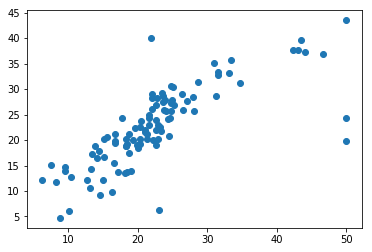

In [24]:
#Scatter plot for the prediction we performed againt out test data
plt.scatter(Y_test, predictions)

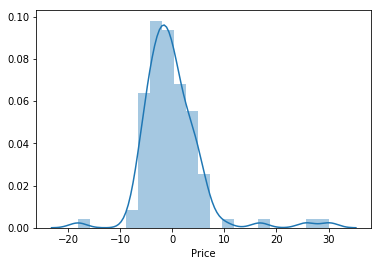

In [25]:
#The distribution
sns.distplot((Y_test-predictions))

In [26]:
#Print the MAE & MSE & RMSE
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 3.7807629091749377
MSE: 34.05648134887441
RMSE: 5.83579312080838


**Note:** The MSE value is very high number which indicats that the Linear regression Model is not the best fit for this prediction. To resolve that, we need to choose better Model.

In [0]:
#Import other needed libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [28]:
#Set variables for folds & seed
folds_number= 10
seed_number = 9
metric  = "neg_mean_squared_error"

#hold different regression models in a single dictionary
regression_models = {}
regression_models["Linear"]        = LinearRegression()
regression_models["Lasso"]         = Lasso()
regression_models["ElasticNet"]    = ElasticNet()
regression_models["KNN"]           = KNeighborsRegressor()
regression_models["DecisionTree"]  = DecisionTreeRegressor()
regression_models["SVR"]           = SVR(gamma='scale')
regression_models["AdaBoost"]      = AdaBoostRegressor()
regression_models["GradientBoost"] = GradientBoostingRegressor()
regression_models["RandomForest"]  = RandomForestRegressor(n_estimators=100)
regression_models["ExtraTrees"]    = ExtraTreesRegressor(n_estimators=100)

#Cross validation for 10 folds
model_results = []
model_names   = []
for regression_model in regression_models:
	model   = regression_models[regression_model]
	k_fold  = KFold(n_splits=folds_number, random_state=seed_number)
	results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(regression_model)
	print("The Model {}: {}, {}".format(regression_model, round(results.mean(), 3), round(results.std(), 3)))

The Model Linear: -21.38, 9.414
The Model Lasso: -26.424, 11.651
The Model ElasticNet: -27.502, 12.305
The Model KNN: -41.896, 13.902
The Model DecisionTree: -29.815, 13.283
The Model SVR: -67.828, 29.049
The Model AdaBoost: -14.839, 6.207
The Model GradientBoost: -10.251, 4.577
The Model RandomForest: -12.078, 6.427
The Model ExtraTrees: -9.275, 5.627


In [0]:
#Create box-whisker plot for comparing models and save it as png file
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 35, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.tight_layout()
plt.savefig("MSE_Scores_for_Regression_Models.png")
plt.clf()
plt.close()

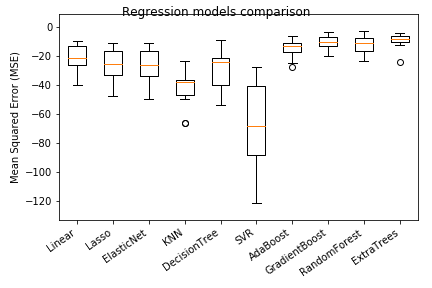

In [30]:
#View Image generated
from IPython.display import Image
Image("MSE_Scores_for_Regression_Models.png")

In [31]:
#Create and fit our best model
best_regression_model = GradientBoostingRegressor(random_state=seed_number)
best_regression_model.fit(X_train, Y_train)

#Perform predictions using the best model
predictions = best_regression_model.predict(X_test)
print("The MSE is : {}".format(round(metrics.mean_squared_error(Y_test, predictions), 3)))

The MSE is : 10.562


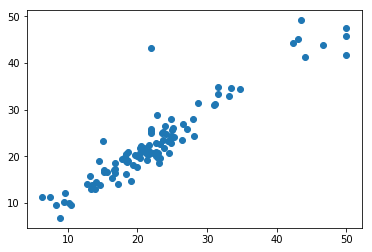

In [32]:
plt.scatter(Y_test, predictions)

**Note:** We have a better scatter with **GradientBoost** Regression Model since the MSE value is much better than the linear regression model

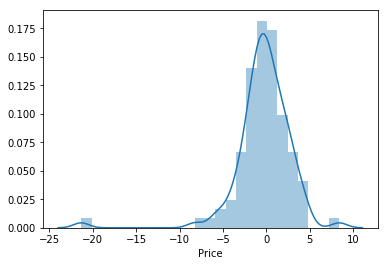

In [33]:
#The distribution for GradientBoost Model prediction
sns.distplot((Y_test-predictions))

In [0]:
# TODO : perform GridSearchCV 